In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv('/Users/lokeshreddychavva/Downloads/heart.csv')


In [4]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
#Check for null values
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
#unique values in target variable
dataset['target'].unique()

array([1, 0])

In [9]:
dataset['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

165 patients have heart disease and 138 don't have heart disease.

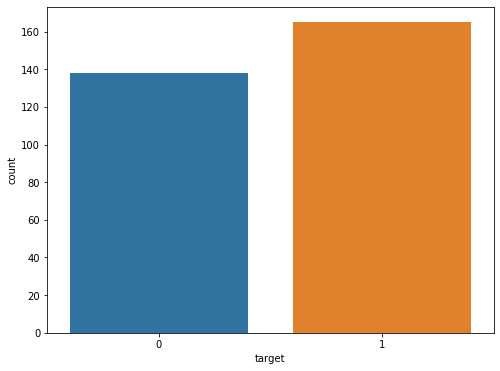

In [10]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", data=dataset)
plt.show()

In [11]:
#Heart disease according to sex
dataset.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

1 - male, 0 - female. So 72 females and 93 males have heart diseases and 24 females and 114 males don't have it.

In [12]:
correlation = dataset.corr()

In [13]:
correlation['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

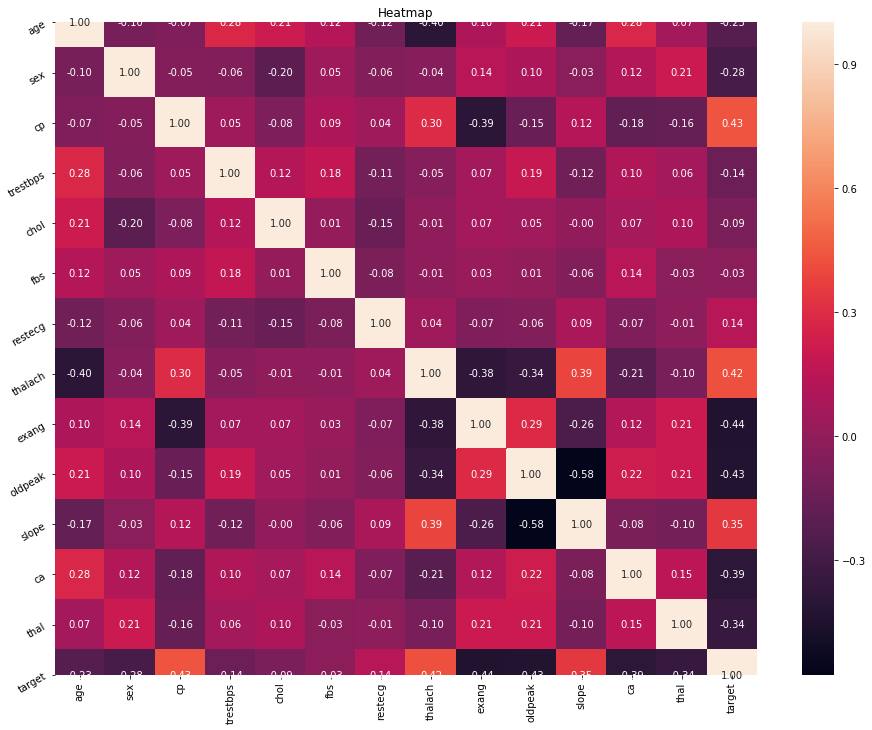

In [14]:
plt.figure(figsize=(16,12))
plt.title('Heatmap')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

cp,thalach,slope are highly positively correlated to target and exang,oldpeak,ca,thal are highly negatively correlated to target variable.

Text(0.5, 1.0, 'Chest Pain vs Heart Disease')

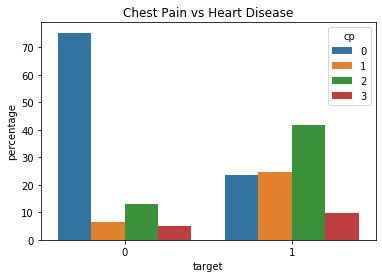

In [15]:
cp_heart = (dataset.groupby(['target']))['cp'].value_counts(normalize=True)\
.mul(100).reset_index(name = "percentage")
sns.barplot(x = "target", y = "percentage", hue = "cp", data = cp_heart)\
.set_title("Chest Pain vs Heart Disease")

Chest pain type 2 highly contributes for the presence of heart disease followed by 1,0 and 3.

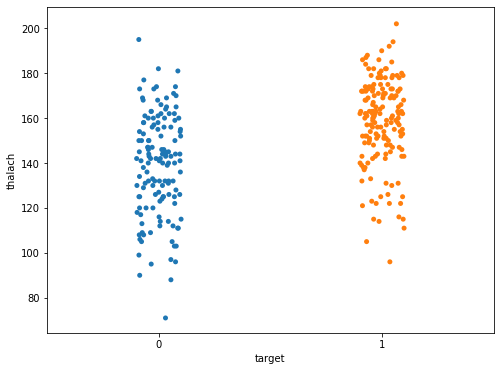

In [16]:
# thalach vs heart disease
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="target", y="thalach", data=dataset)
plt.show()

We can see that those people suffering from heart disease have relatively higher heart rate (thalach) as compared to people who are not suffering from heart disease.

In [17]:
dataset['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

Mean value of age of patients in our dataset is 54 which ranges from minimum 29 to maximum 77.

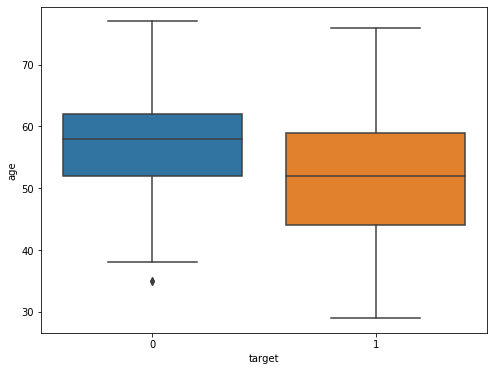

In [18]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="target", y="age", data=dataset)
plt.show()

The mean age of the people who have heart disease is less than the mean age of the people who do not have heart disease.

In [19]:
# Avg age of male who got heart disease
dataset[(dataset.target ==  1) & (dataset.sex == 1)].age.mean()

50.903225806451616

In [20]:
# Avg age of female who got heart disease
dataset[(dataset.target ==  1) & (dataset.sex == 0)].age.mean()

54.55555555555556

In [24]:
x = dataset.age.tolist()
xyz = []
for i in x:
    if i < 20:
        xyz.append("teenager")
    elif i < 30:
        xyz.append("20 - 30")
    elif i < 40:
        xyz.append("30 - 40")
    elif i < 50:
        xyz.append("40 - 50")
    elif i < 60:
        xyz.append("50 - 60")
    else:
        xyz.append("senior citizen")
dataset["age_category"] = xyz

In [25]:
analysis = dataset.groupby(["age_category","sex","target"]).\
agg({"age":"mean", "trestbps":"mean", "chol":"mean", "thalach":"mean",\
     "exang":"mean","oldpeak":"mean", "slope":"mean","fbs" : pd.Series.mode,\
     "cp" : pd.Series.mode, "restecg": pd.Series.mode,"ca":pd.Series.mode,"thal":pd.Series.mode})


In [26]:
analysis

age    trestbps        chol     thalach  \
age_category   sex target                                                  
20 - 30        1   1       29.000000  130.000000  204.000000  202.000000   
30 - 40        0   1       36.800000  121.600000  205.400000  175.000000   
               1   0       36.750000  121.000000  232.500000  152.000000   
                   1       36.833333  131.000000  215.833333  177.166667   
40 - 50        0   0       43.000000  132.000000  341.000000  136.000000   
                   1       44.333333  122.333333  228.611111  159.555556   
               1   0       45.000000  123.047619  235.000000  144.000000   
                   1       43.937500  125.125000  237.187500  169.906250   
50 - 60        0   0       56.200000  152.200000  280.400000  141.000000   
                   1       54.000000  128.000000  265.458333  155.000000   
               1   0       55.740000  134.780000  248.780000  136.980000   
                   1       54.487805  130.512195  227.170732  159.121951   
senior citizen 0   0       62.461538  142.538462  265.692308  144.000000   
                   1       66.000000  135.480000  278.920000  144.920000   
               1   0       64.487179  134.179487  249.923077  135.820513   
                   1       64.923077  138.076923  236.846154  140.846154   

                              exang   oldpeak     slope  fbs      cp  restecg  \
age_category   sex target                                                       
20 - 30        1   1       0.000000  0.000000  2.000000    0       1        0   
30 - 40        0   1       0.000000  0.420000  1.800000    0       2        1   
               1   0       0.750000  1.650000  1.250000    0       0        1   
                   1       0.000000  0.583333  1.666667    0       2        1   
40 - 50        0   0       1.000000  3.000000  1.000000    1       0        0   
                   1       0.222222  0.305556  1.333333    0  [1, 2]        1   
               1   0       0.428571  1.042857  1.285714    0       0        0   
                   1       0.093750  0.434375  1.781250    0  [1, 2]        1   
50 - 60        0   0       0.800000  1.550000  1.000000    0       0        0   
                   1       0.083333  0.604167  1.666667    0       2        0   
               1   0       0.560000  1.524000  1.180000    0       0        0   
                   1       0.219512  0.658537  1.536585    0       2        1   
senior citizen 0   0       0.384615  1.976923  0.923077    0       0        0   
                   1       0.080000  0.712000  1.640000    0       2        1   
               1   0       0.564103  1.792308  1.205128    0       0        0   
                   1       0.230769  0.915385  1.307692    0  [0, 3]        0   

                                  ca  thal  
age_category   sex target                   
20 - 30        1   1               0     2  
30 - 40        0   1               0     2  
               1   0               0     3  
                   1               0     2  
40 - 50        0   0               0     3  
                   1               0     2  
               1   0               0     3  
                   1               0     2  
50 - 60        0   0          [0, 2]     3  
                   1               0     2  
               1   0               1     3  
                   1               0     2  
senior citizen 0   0       [0, 2, 3]     3  
                   1               0     2  
               1   0          [1, 2]     3  
                   1               0     2

Each and every Age Group has thal-type- 2, ca-type-0 for Heart Disease victims and cp-type-0 for Non Heart Disease victims irrespective of Gender.

thalach value is more for Heart Disease victims.